In [7]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet("hf://datasets/damlab/HIV_PI/data/train-00000-of-00001.parquet")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  1733 non-null   object
 1   id        1733 non-null   object
 2   FPV       1733 non-null   bool  
 3   IDV       1733 non-null   bool  
 4   NFV       1733 non-null   bool  
 5   SQV       1733 non-null   bool  
 6   fold      1733 non-null   int32 
dtypes: bool(4), int32(1), object(2)
memory usage: 40.7+ KB


Dataset preview

In [3]:
display(df.head())

,sequence,id,FPV,IDV,NFV,SQV,fold
0,PQITLWQRPLVTIKIGGQLKEALLDTGADNTVLEEMNLPGRWKPKM...,12861,False,False,True,False,3
1,PQITLWQRPLVTIKIGGQLKEALLDTGADNTVLEEMNLPGRWKPKI...,12862,False,False,True,False,4
2,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKI...,12863,False,False,False,False,4
3,PQITLWQRPRVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKI...,12864,True,False,False,False,0
4,PQITLWQRPIVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,12865,False,False,True,True,1


In [4]:
# Get basic info about the data types and missing values
print("\nData Types and Missing Values:")
df.info()


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  1733 non-null   object
 1   id        1733 non-null   object
 2   FPV       1733 non-null   bool  
 3   IDV       1733 non-null   bool  
 4   NFV       1733 non-null   bool  
 5   SQV       1733 non-null   bool  
 6   fold      1733 non-null   int32 
dtypes: bool(4), int32(1), object(2)
memory usage: 40.7+ KB


In [5]:
print("\nSummary Statistics (Numerical Columns):")
display(df.describe())


Summary Statistics (Numerical Columns):


,fold
count,1733.000000
mean,2.000577
std,1.392200
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [8]:
# Generate summary statistics for boolean and categorical columns
print("\nSummary Statistics (Boolean Columns):")
display(df.describe(include=[np.bool_]))


Summary Statistics (Boolean Columns):


,FPV,IDV,NFV,SQV
count,1733,1733,1733,1733
unique,2,2,2,2
top,False,False,True,False
freq,1110,940,930,1067


In [9]:
# Find duplicate rows in the dataset
print("\nDuplicate Rows Count:")
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")


Duplicate Rows Count:
Number of duplicate rows: 0


In [10]:
print("\nValue Counts for 'id' Column:")
id_value_counts = df['id'].value_counts()
print(id_value_counts.head())  # Show the top 5 most common 'id'


Value Counts for 'id' Column:
id
12861     1
172142    1
10928     1
66238     1
8085      1
Name: count, dtype: int64



Distribution of Sequence Lengths:


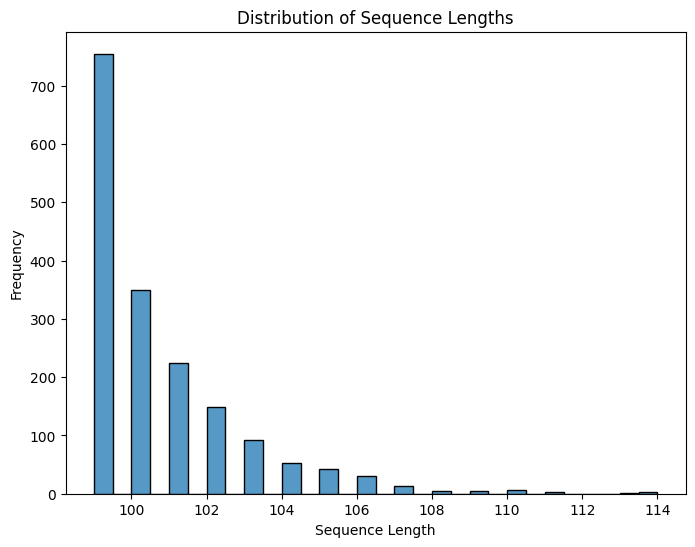

In [11]:
print("\nDistribution of Sequence Lengths:")
df['sequence_length'] = df['sequence'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df['sequence_length'], bins=30)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()

In [12]:
print("\nCrosstab of 'fold' and 'FPV':")
crosstab = pd.crosstab(df['fold'], df['FPV'])
print(crosstab)


Crosstab of 'fold' and 'FPV':
FPV   False  True 
fold              
0       207    122
1       239    128
2       211    124
3       242    136
4       211    113
